In [1]:
import oommfc as mc
import discretisedfield as df
import micromagneticmodel as mm

region = df.Region(p1=(-50e-9, -50e-9, 0), p2=(50e-9, 50e-9, 10e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))

system = mm.System(name='hysteresis')


def Hval(point):
    x, y, z = point
    
    if x < 0:
        return (0, 0, 1e6)
    else:
        return (0, 0, 1e6)

H = df.Field(mesh, dim=3, value=Hval)

system.energy = mm.Exchange(A=1e-12) + mm.Demag()

Ms = 1.1e6

# create system with above geometry and initial magnetisation
system.m = df.Field(mesh, dim=3, value=(0, 0, 1), norm=Ms)

Running OOMMF (ExeOOMMFRunner) [2020/12/31 15:04]... (1.1 s)


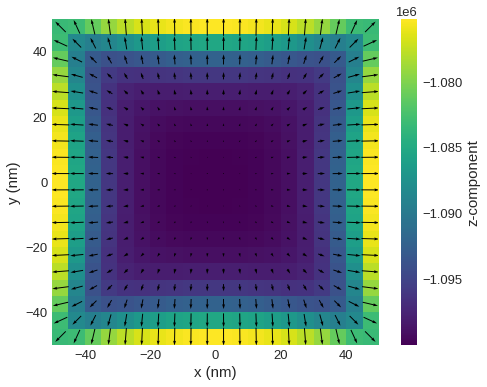

In [2]:
Hmin = (0, 0, -1e6)
Hmax = (0, 0, 1e6)
n = 3

# minimize the energy
hd = mc.HysteresisDriver()
hd.drive(system, Hmin=Hmin, Hmax=Hmax, n=n)

# Plot relaxed configuration: vectors in z-plane
system.m.plane('z').mpl()

In [3]:
system.table.mpl?

Signature:
system.table.mpl(
    ax=None,
    figsize=None,
    yaxis=None,
    xlim=None,
    multiplier=None,
    filename=None,
    **kwargs,
)
Docstring:
Table data plot.

This method plots the scalar values as a function of time. ``mpl`` adds
the plot to ``matplotlib.axes.Axes`` passed via ``ax`` argument. If
``ax`` is not passed, ``matplotlib.axes.Axes`` object is created
automatically and the size of a figure can be specified using
``figsize``. To choose particular data columns to be plotted ``yaxis``
can be passed as a list of column names. The range of ``t`` values on
the horizontal axis can be defined by passing a lenth-2 tuple using
``xlim``. It is often the case that the time length is small (e.g. on a
nanosecond scale). Accordingly, ``multiplier`` can be passed as
:math:`10^{n}`, where :math:`n` is a multiple of 3  (..., -6, -3, 0, 3,
6,...). According to that value, the horizontal axis will be scaled and
appropriate units shown. For instance, if ``multiplier=1e-9`` is
pas

In [4]:
system.m.orientation((-20e-9, 0, 0))

(-0.043787190580416566, 0.0028442060937944225, -0.9990368323704437)

In [6]:
system.table

   max_mxHxm             E       delta_E  bracket_count  line_min_count  \
0   0.069578 -7.752901e-17 -9.860761e-32           63.0            13.0   
1   0.066705  9.425059e-18 -5.885642e-31          123.0            39.0   
2   0.091623 -7.752901e-17 -3.204747e-31          162.0            52.0   
3   0.076036  1.078287e-18 -9.032611e-32          322.0           105.0   
4   0.087125 -7.752901e-17 -1.232595e-32          381.0           138.0   

   conjugate_cycle_count  cycle_count  cycle_sub_count  energy_calc_count  \
0                   44.0         56.0             12.0               77.0   
1                   67.0        105.0             24.0              164.0   
2                   86.0        137.0             13.0              217.0   
3                  162.0        266.0             25.0              431.0   
4                  174.0        314.0             36.0              524.0   

     E_exchange  ...            B   Bx   By           Bz  iteration  \
0  1.260404e-19

In [ ]:
system.table.mpl(yaxis=['mz'])

In [ ]:
system.table

In [ ]:
import micromagneticmodel as mm

In [ ]:
mm.__version__

In [ ]:
a = ['r1', 'r2']
f'{{main_atlas {" ".join(a)}}}'